In [1]:
import torch
from PIL import Image, ImageDraw
import cv2
import numpy as np
import os

In [16]:
# Convert video to image sequence (640 x 480)
vidcap = cv2.VideoCapture('../training_videos/office_clutter/vids/traj6_t.avi')
success, image = vidcap.read()

count = 1611
while success:
    cv2.imwrite(f"../training_videos/office_clutter/clutter_t_jpgs/image_{count:04d}.jpg", image)
    success, image = vidcap.read()
    print('Saved image ', count)
    count += 1


Saved image  1611
Saved image  1612
Saved image  1613
Saved image  1614
Saved image  1615
Saved image  1616
Saved image  1617
Saved image  1618
Saved image  1619
Saved image  1620
Saved image  1621
Saved image  1622
Saved image  1623
Saved image  1624
Saved image  1625
Saved image  1626
Saved image  1627
Saved image  1628
Saved image  1629
Saved image  1630
Saved image  1631
Saved image  1632
Saved image  1633
Saved image  1634
Saved image  1635
Saved image  1636
Saved image  1637
Saved image  1638
Saved image  1639
Saved image  1640
Saved image  1641
Saved image  1642
Saved image  1643
Saved image  1644
Saved image  1645
Saved image  1646
Saved image  1647
Saved image  1648
Saved image  1649
Saved image  1650
Saved image  1651
Saved image  1652
Saved image  1653
Saved image  1654
Saved image  1655
Saved image  1656
Saved image  1657
Saved image  1658
Saved image  1659
Saved image  1660
Saved image  1661
Saved image  1662
Saved image  1663
Saved image  1664
Saved image  1665
Saved imag

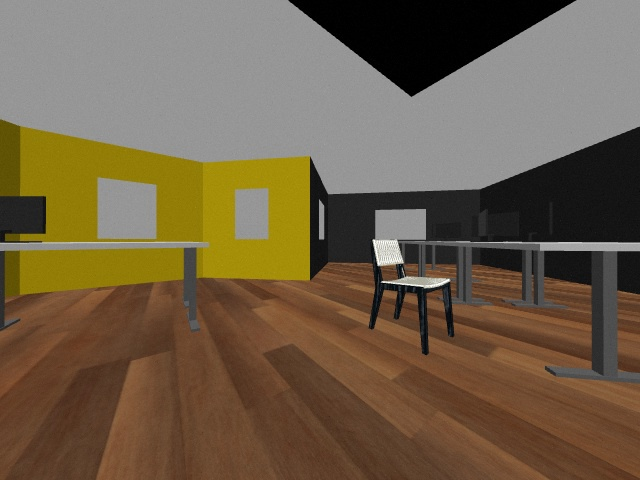

In [24]:
# Display frame from image sequence
image = cv2.imread("../training_videos/office_drone/drone_jpgs/image_0950.jpg")

# convert color from CV2 BGR back to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display(Image.fromarray(image))

In [104]:
# Thresholding mask images with white and green chair
masks = list(sorted(os.listdir(os.path.join("../training_videos/office_clutter/", "clutter_t_jpgs"))))

for idx in range(0,len(masks)):
    mask = Image.open("../training_videos/office_clutter/clutter_t_jpgs/" + masks[idx])
    mask_r, mask_g, mask_b = mask.split()

    mask = np.array(mask)
    mask_g = np.array(mask_g)
    mask_b = np.array(mask_b)
    mask_r = np.array(mask_r)

    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            # Blue table
            if mask_g[i][j] < 50 and mask_r[i][j] < 50 and mask_b[i][j] > 150:
                mask[i][j] = 5
            # Red table
            elif mask_g[i][j] < 50 and mask_r[i][j] > 150 and mask_b[i][j] < 50:
                mask[i][j] = 4
            # Yellow chair
            elif mask_g[i][j] > 180 and mask_r[i][j] > 180 and mask_b[i][j] < 100:
                mask[i][j] = 3
            # Green chair
            elif mask_g[i][j] > 150 and mask_r[i][j] < 80 and mask_b[i][j] < 80:
                mask[i][j] = 2
            # White chair
            elif mask_b[i][j] > 200 and mask_g[i][j] > 200 and mask_r[i][j] > 200:
                mask[i][j] = 1
            else:
                mask[i][j] = 0

    mask = Image.fromarray(np.uint8(mask)).convert('L')
    mask.save("../training_videos/office_clutter/clutter_t_edit_jpgs/" + masks[idx], "PNG")

    print(round(idx/len(masks),4) * 100, "% Done")

"""
mask.putpalette([
    0, 0, 0, # Affects background (rgb for pixels with (0,0,0))
    255, 255, 255, # (1,1,1)
    0, 255, 0, # (2,2,2)
    255, 255, 0, # (3,3,3)
    255, 0, 0, # (4,4,4)
    0, 0, 255 # (5,5,5)
])
mask
"""

0.0 % Done


KeyboardInterrupt: 

In [7]:
# Thresholding mask images with white and green chair
masks = list(sorted(os.listdir(os.path.join("../training_videos/office_drone/", "drone_t_jpgs"))))

for idx in range(0,len(masks)):
    print(idx)
    mask = Image.open("../training_videos/office_drone/drone_t_jpgs/" + masks[idx])
    mask_r, mask_g, mask_b = mask.split()

    mask = np.array(mask)
    mask_g = np.array(mask_g)
    mask_b = np.array(mask_b)

    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask_g[i][j] > 220 and mask_b[i][j] < 50:
                mask[i][j] = 2
            elif mask_b[i][j] > 240 and mask_b[i][j] > 240:
                mask[i][j] = 1
            else:
                mask[i][j] = 0

    mask = Image.fromarray(np.uint8(mask)).convert('L')
    mask.save("../training_videos/office_drone/drone_t_edit_jpgs/" + masks[idx], "PNG")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
imgs = list(sorted(os.listdir(os.path.join("../training_videos/", "train1_jpgs"))))

for idx in range(0,len(imgs)):
    img = Image.open("../training_videos/train1_jpgs/" + imgs[idx]).convert('L')
    img = img.resize((640,480))

    img.save("../training_videos/train1_resize640_jpgs/" + imgs[idx], "JPEG")

In [19]:
imgs = list(sorted(os.listdir(os.path.join("../training_videos/office_s/", "s_t_jpgs"))))

for idx in range(0,len(imgs)):
    mask = Image.open("../training_videos/office_s/s_t_jpgs/" + imgs[idx]).convert('L')
    #mask = mask.resize((320,240))
    mask = np.array(mask)

    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j] > 240:
                mask[i][j] = 1
            else:
                mask[i][j] = 0

    mask = Image.fromarray(np.uint8(mask))
    mask.save("../training_videos/office_s/s_t_edit_jpgs/" + imgs[idx], "JPEG")

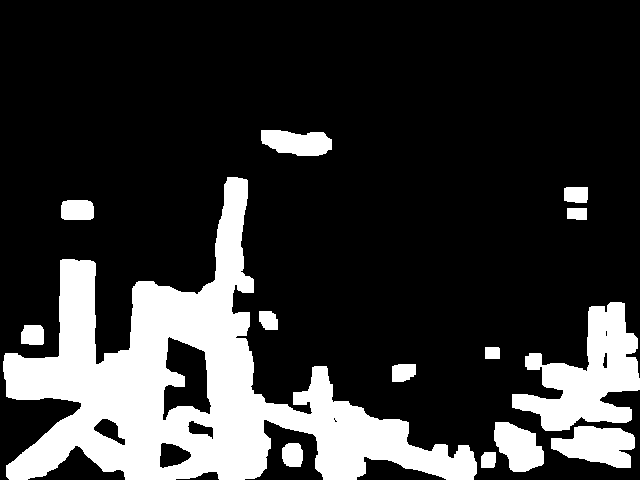

In [19]:
# Thresholding optical flow images
#imgs = list(sorted(os.listdir(os.path.join("../training_videos/office_s/", "s_of_jpgs"))))
#for idx in range(0,len(imgs)):
mask = Image.open("../training_videos/office_s/s_of_jpgs/image_166.jpg").convert('L')
mask = np.array(mask)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] > 20:
            mask[i][j] = 255
        else:
            mask[i][j] = 0

# Erosion and dilation
kernel = np.ones((3,3), np.uint8)
mask = cv2.erode(mask, kernel, iterations=5)
mask = cv2.dilate(mask, kernel, iterations=5)

mask = Image.fromarray(np.uint8(mask))
mask
#mask.save("../training_videos/office_s/s_of_th_ed_jpgs/" + imgs[idx], "JPEG")

In [89]:
# Thresholding ESTMD images
imgs = list(sorted(os.listdir(os.path.join("../training_videos/office_s/", "s_estmd_jpgs"))))
for idx in range(0,len(imgs)):
    mask = Image.open("../training_videos/office_s/s_estmd_jpgs/" + imgs[idx]).convert('L')
    mask = np.array(mask)

    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j] > 20:
                mask[i][j] = 1
            else:
                mask[i][j] = 0

    mask = Image.fromarray(np.uint8(mask))
    mask.save("../training_videos/office_s/s_estmd_th_jpgs/" + imgs[idx], "JPEG")

In [135]:
# Thresholding optical flow images
mask = Image.open("../training_videos/office_s/s_of_jpgs/image_195.jpg").convert('L')
mask = np.array(mask)

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if mask[i][j] > 20:
            mask[i][j] = 1
        else:
            mask[i][j] = 0

# Erosion and dilation
kernel = np.ones((3,3), np.uint8)
mask = cv2.erode(mask, kernel, iterations=10)
mask = cv2.dilate(mask, kernel, iterations=5)

mask = Image.fromarray(np.uint8(mask))
mask.save("../training_videos/office_s/s_of_th_ed_jpgs/image_195.jpg", "JPEG")


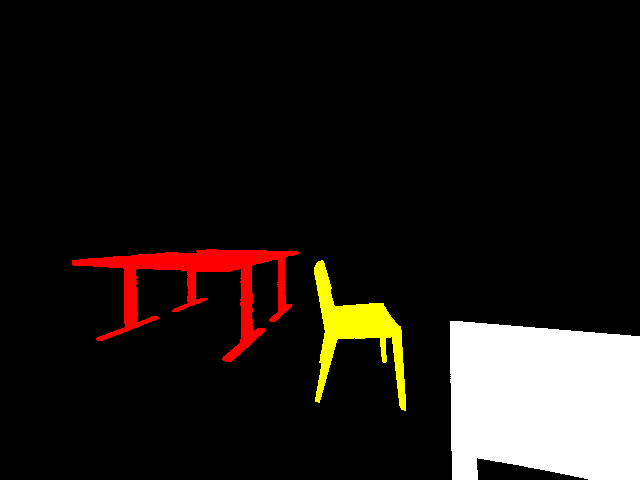

In [79]:
mask = Image.open("../training_videos/office_clutter/clutter_t_edit_jpgs/image_053.jpg")

mask.putpalette([
    0, 0, 0, # Affects background (rgb for pixels with (0,0,0))
    255, 255, 255, # (1,1,1)
    0, 255, 0, # (2,2,2)
    255, 255, 0, # (3,3,3)
    255, 0, 0, # (4,4,4)
    0, 0, 255 # (5,5,5)
])
mask

# You would do this if you set each object in your figure to (0,0,0), (1,1,1), etc
# For my training data I have set everything to white, so this is not needed

In [114]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image

# Creating a class to store our dataset and access it easier later
class Dataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root # Root directory to find images
        self.transforms = transforms # Stores transformed images for data augmentation
        # Store all image file paths, sorting them to ensure they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "clutter_jpgs"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "clutter_t_edit_jpgs"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "clutter_jpgs", self.imgs[idx])
        mask_path = os.path.join(self.root, "clutter_t_edit_jpgs", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # Mask not converted to RGB as each colour corresponds to a different object.
        # with 0 being bg
        # Mask is in "L" mode (greyscale)
        mask = Image.open(mask_path)
        
        mask = np.array(mask)
        # Get all unique object ids (if there are three objects => [0,1,2])
        obj_ids = np.unique(mask)
        print("obj_ids: ", obj_ids)
        # Remove first id which is the background
        # obj_ids = obj_ids[1:]

        # Split the color-encoded mask into a set of binary masks
        # Still need to figure how this works exactly
        masks = mask == obj_ids[:, None, None]
        print("Masks: ", masks)

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        print("Num_objs: ", num_objs)
        boxes = []
        for i in range(num_objs):
            # Not sure how numpy where works
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])

            if xmin == xmax:
                xmax = xmax + 3
            if ymin == ymax:
                ymax = ymax + 3
            boxes.append([xmin, ymin, xmax, ymax])
        
        # Saving bounding box coordinates in pytorch tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # There is only one class (person), change if more objects are shown in scene
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])

        # Computing area of all bounding boxes
        area = (boxes[:,3] - boxes[:, 1]) * (boxes[:,2] - boxes[:,0])
        
        # Supposed all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Creating dictionary to store info about target
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

In [98]:
dataset = Dataset("../training_videos/office_clutter")
dataset[0]

obj_ids:  [0 1 2 3 4 5]
Masks:  [[[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False

(<PIL.Image.Image image mode=RGB size=640x480 at 0x29FDF884220>,
 {'boxes': tensor([[  0.,   0., 639., 479.],
          [280., 249., 311., 289.],
          [337., 246., 357., 267.],
          [336., 249., 369., 297.],
          [372., 248., 393., 286.],
          [  0., 249., 274., 366.]]),
  'labels': tensor([1, 1, 1, 1, 1, 1]),
  'masks': tensor([[[1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           ...,
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1],
           [1, 1, 1,  ..., 1, 1, 1]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           

In [106]:
# Fintuning from a pretrained model

import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# Load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# Replace the classifier with a new one, that has num_clsses which is user-defined
num_classes = 2 # 1 class (person) + background
# Get number of input features the classifier uses
in_features = model.roi_heads.box_predictor.cls_score.in_features
# Replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [107]:
# Modifying the model to add a different backbone
# Most probably what I'll be using

import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# Load a pre-trained for classification and return only the features
backbone = torchvision.models.mobilenet_v2(pretrained=True).features
# FasterRCNN needs to know the number of output channels in a backbone.
# For mobilenet_v2, it's 1280
backbone.out_channels = 1280

# Let's make the RPN generate 5 x 3 anchors per spatial location
# with 5 different sizes and 3 differen aspect ratios.
# We have a Tuple[Tuple[int]] because each features map could potentially
# have different sizes and aspect ratios
# More info here: https://medium.com/swlh/object-detection-with-deep-learning-rcnn-anchors-non-maximum-suppression-ce5a83c7c62b
anchor_generator = AnchorGenerator(sizes=((32, 64, 256, 512),),
                                    aspect_ratios=((0.5, 1.0, 2.0),))

# Lets define what are the feature maps that we will use to perform the RoI cropping
# as well as the size of the crop after rescaling
# If your backbone returns a Tensor, featmap_names is expeted to be [0].
# More generally, the backbone should return an OrderedDict[Tensor], 
# and in featmap_names you can choose which feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=[0],
                                                output_size=7,
                                                sampling_ratio=2)

# Put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                    num_classes=2,
                    rpn_anchor_generator=anchor_generator,
                    box_roi_pool=roi_pooler)

In [108]:
def get_instance_segmentation_model(num_classes):
    # Load an instance segmentation model
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=False)

    # Get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # Replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # Now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # Replacing the mask predicitor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask,
                                                    hidden_layer,
                                                    num_classes)

    return model

In [109]:
# Let's write some helper functions for data augmentation / transformation,
# which leverages the functions in refereces/detection that we have just copied

from engine import train_one_epoch, evaluate
import utils
import transforms as T

def get_transform(train):
    transforms = []
    # Converts the image, a PIL image, into a PyTorch Tensor
    # I would need to edit this transforms file to support cv images
    transforms.append(T.ToTensor())
    if train:
        # During training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [115]:
# Use our dataset and defined transformations
dataset = Dataset("../training_videos/office_clutter", get_transform(train=True))
dataset_test = Dataset("../training_videos/office_clutter", get_transform(train=False))

# Split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
# Choosing all random indices except the last 50
dataset = torch.utils.data.Subset(dataset, indices[:-50])
# Last 50 indices used for testing/evaluating
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# Define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=1, shuffle=True, num_workers=0,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=5, shuffle=False, num_workers=0,
    collate_fn=utils.collate_fn)

In [116]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# Now let's instantiate the model and the optimizer
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Number of classes in dataset, background, chair and desk
num_classes = 3

# Get the model using our helper function
model = get_instance_segmentation_model(num_classes)
# Move model to the right device
model.to(device)

# Construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# And a learning arte scheduler which decreases the learning rate by 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                                step_size=3,
                                                gamma=0.1)

In [112]:
# Specify number of epochs
num_epochs = 10

for epoch in range(num_epochs):
    # Train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=1)
    # Update the learning rate
    lr_scheduler.step()
    # Evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

obj_ids:  [0 1 2 3 4 5]
Masks:  [[[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False

IndexError: list index out of range

obj_ids:  [0 1 2]
Masks:  [[[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]]
Num_objs:  3


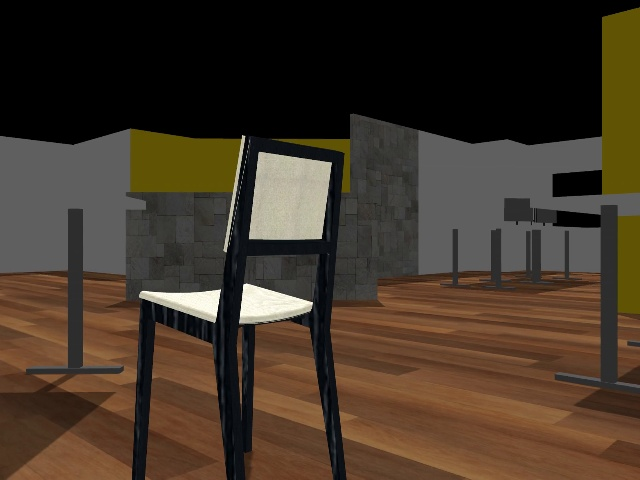

In [11]:
# Pick on image from the test set 5, 15, 23, 24, 30, 32, 42
img, _ = dataset_test[5]
# Putting model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())

In [12]:
#_, test = dataset_test[7]
test
#prediction[0]['boxes'][0].tolist()
#dataset_test[0]

NameError: name 'test' is not defined

In [13]:
test = Image.fromarray(img.mul(255).permute(1, 2, 0).byte().numpy())
test1 = ImageDraw.Draw(test)
test1.rectangle(prediction[0]['boxes'][1].tolist(), outline = "green", width = 5)
test.show()

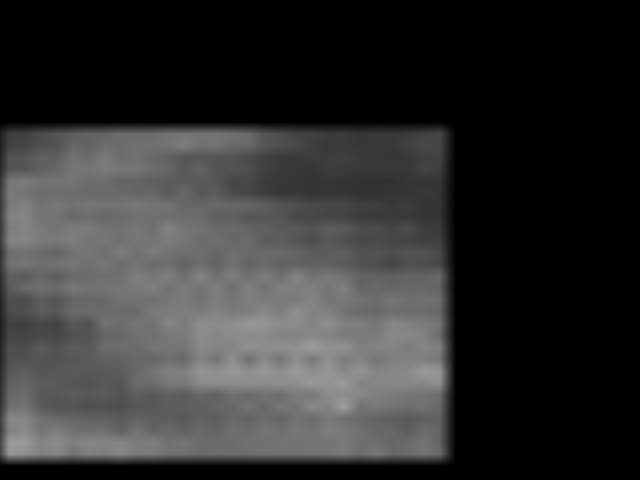

In [126]:
Image.fromarray(prediction[0]['masks'][1, 0].mul(255).byte().cpu().numpy())